# Plot results

This notebook plots some summarizations of the `results.txt` file generated by the other notebook in this folder.

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
df1 = pd.read_csv('../results_hospmort.csv', na_values=['-'])
df2 = pd.read_csv('../results_othermort.csv', na_values=['-'])
df = pd.concat([df1, df2])
df.head()

,Cohort,N_Study,N_Repro,Y_Study,Y_Repro,Model,Study,GB,LR,Notes
0,caballero2015dynamically $W$=24,11648,11648,NaN,13.01,NonLin,0.8657,0.9060,0.88616,KF
1,caballero2015dynamically $W$=48,11648,11648,NaN,13.01,NonLin,0.7985,0.9227,0.90340,KF
2,caballero2015dynamically $W$=72,11648,11648,NaN,13.01,NonLin,0.7385,0.9314,0.91440,KF
3,calvert2016computational,3054,1985,12.84,13.80,NonLin,0.9340,0.9565,0.90250,Kernel
4,calvert2016using,9683,18396,10.68,14.71,NonLin,0.8800,0.9333,0.91100,Kernal


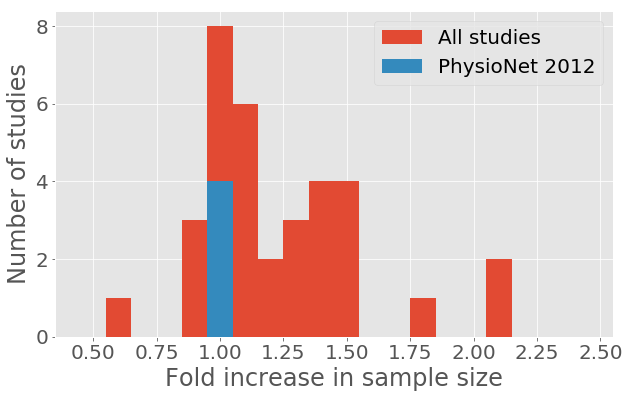

In [3]:
# plot bar chart
xi = np.arange(0.5, 2.6, 0.1)

# exclude studies which had a fixed sample size
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72']

idxIgnore = np.in1d(df['Cohort'], studies_ignore)

plt.figure(figsize=[10,6])
plt.hist(df.loc[~idxIgnore,'N_Repro']/df.loc[~idxIgnore,'N_Study'], bins=xi,
         align='left',label='All studies')

# overlay the physionet 2012 datasets
studies_pn2012 = ['che2016recurrent (b)','ding2016mortality',
                 'johnson2012patient', 'johnson2014data']
idxShow = np.in1d(df['Cohort'], studies_pn2012)
plt.hist(df.loc[idxShow,'N_Repro']/df.loc[idxShow,'N_Study'], bins=xi,
         align='left',label='PhysioNet 2012')

plt.ylabel('Number of studies')
plt.xlabel('Fold increase in sample size')

plt.legend(loc='upper right')

plt.show()

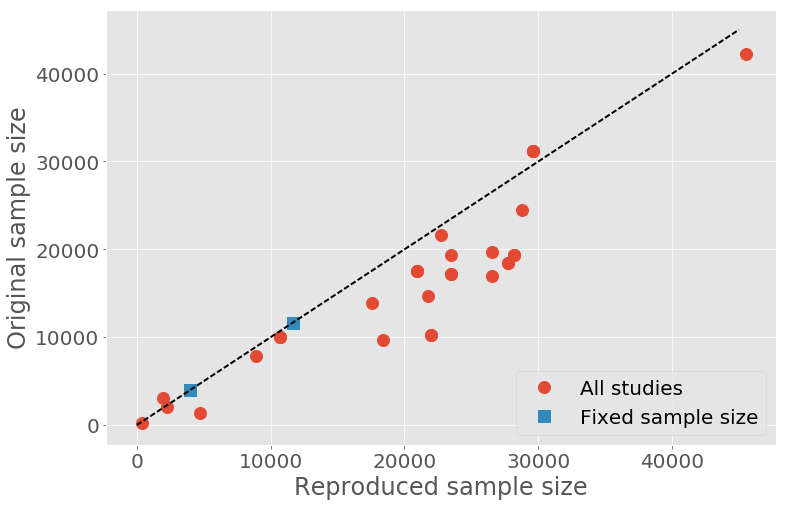

In [4]:


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72',
                  'che2016recurrent (b)','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


# scatter plot
xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot(df.loc[~idxIgnore,'N_Repro'],df.loc[~idxIgnore,'N_Study'], marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the fixed sample size datasets
plt.plot(df.loc[idxIgnore,'N_Repro'],df.loc[idxIgnore,'N_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

plt.plot([0, 45000], [0, 45000], 'k--', linewidth=2)
plt.xlabel('Reproduced sample size')
plt.ylabel('Original sample size')

plt.legend(loc='lower right')

plt.show()

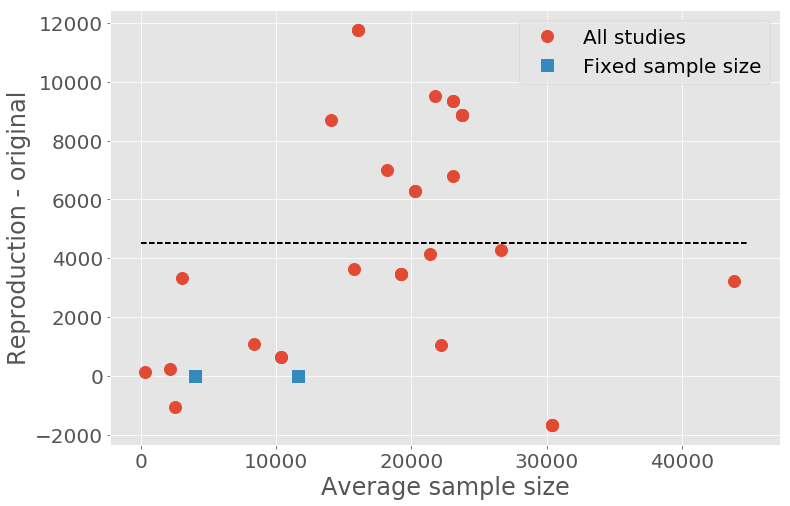

Isolating to studies with non-fixed sample size...
27/31 (87.10%) had repro > study.
23/31 (74.19%) had repro > 1000+study.


In [5]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72',
                  'che2016recurrent (b)','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'N_Repro']+df.loc[~idxIgnore,'N_Study'])/2.0,
         df.loc[~idxIgnore,'N_Repro']-df.loc[~idxIgnore,'N_Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'N_Repro']+df.loc[idxIgnore,'N_Study'])/2.0,
         df.loc[idxIgnore,'N_Repro']-df.loc[idxIgnore,'N_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0, 45000],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'N_Repro']-df.loc[~idxIgnore,'N_Study']),
         'k--', linewidth=2)
plt.xlabel('Average sample size')
plt.ylabel('Reproduction - original')

plt.legend(loc='upper right')

plt.show()





print('Isolating to studies with non-fixed sample size...')
print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df.loc[~idxIgnore,'N_Repro'] > df.loc[~idxIgnore,'N_Study'] ),
        np.sum(~idxIgnore),
        100.0*np.mean( df.loc[~idxIgnore,'N_Repro'] > df.loc[~idxIgnore,'N_Study'] )
    ))
print('{}/{} ({:2.2f}%) had repro > 1000+study.'.format(
        np.sum( df.loc[~idxIgnore,'N_Repro'] > (df.loc[~idxIgnore,'N_Study']+1000) ),
        np.sum(~idxIgnore),
        100.0*np.mean( df.loc[~idxIgnore,'N_Repro'] > (df.loc[~idxIgnore,'N_Study']+1000) )
    ))

# Outcome

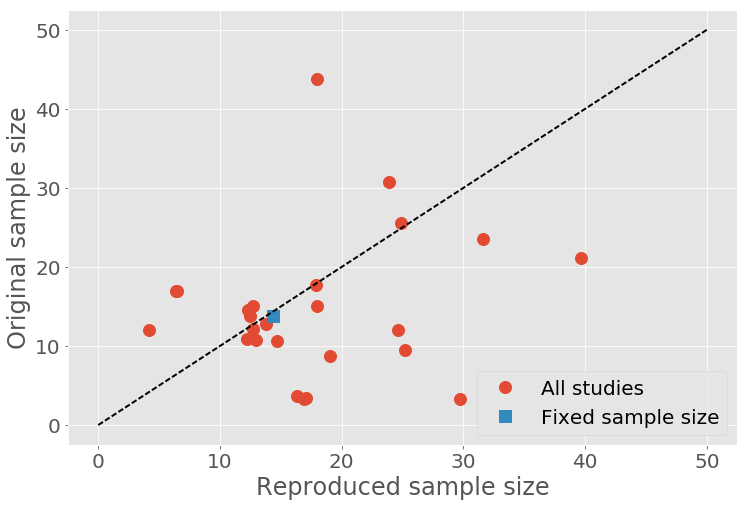

In [6]:
# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72',
                  'che2016recurrent (b)','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


# scatter plot
xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot(df.loc[~idxIgnore,'Y_Repro'],df.loc[~idxIgnore,'Y_Study'], marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the fixed sample size datasets
plt.plot(df.loc[idxIgnore,'Y_Repro'],df.loc[idxIgnore,'Y_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

plt.plot([0, 50], [0, 50], 'k--', linewidth=2)
plt.xlabel('Reproduced sample size')
plt.ylabel('Original sample size')

plt.legend(loc='lower right')

plt.show()

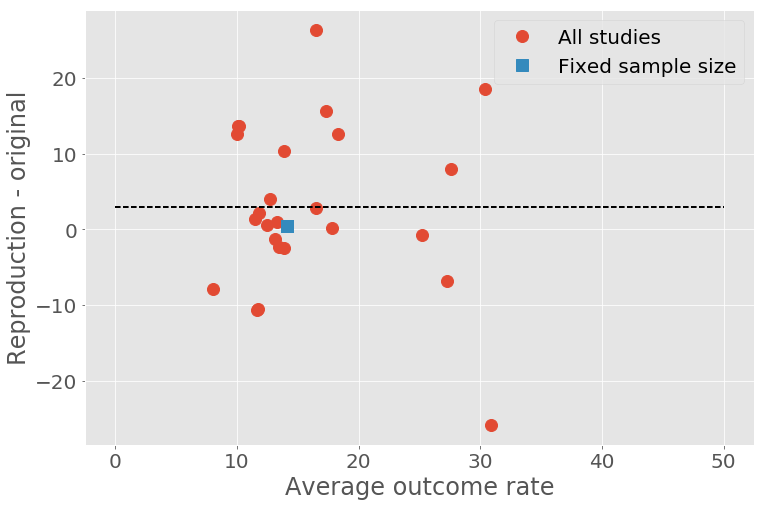

In [7]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72',
                  'che2016recurrent (b)','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'Y_Repro']+df.loc[~idxIgnore,'Y_Study'])/2.0,
         df.loc[~idxIgnore,'Y_Repro']-df.loc[~idxIgnore,'Y_Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'Y_Repro']+df.loc[idxIgnore,'Y_Study'])/2.0,
         df.loc[idxIgnore,'Y_Repro']-df.loc[idxIgnore,'Y_Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0, 50],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'Y_Repro']-df.loc[~idxIgnore,'Y_Study']),
         'k--', linewidth=2)
plt.xlabel('Average outcome rate')
plt.ylabel('Reproduction - original')

plt.legend(loc='upper right')

plt.show()

# AUROC

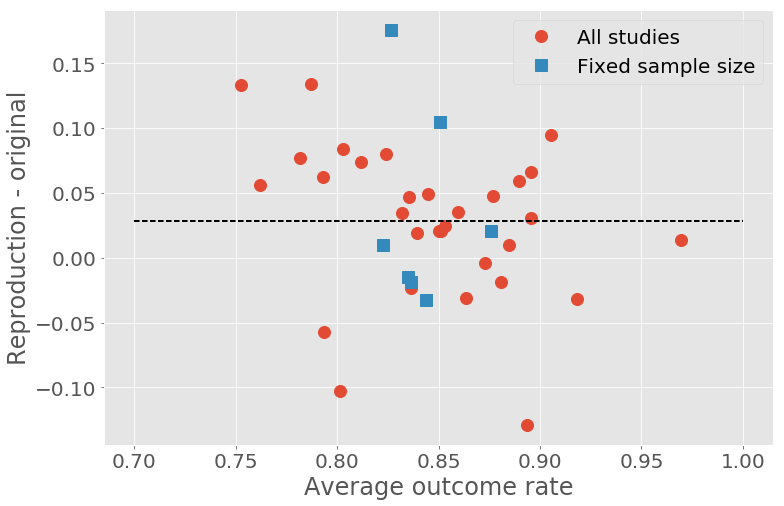

27/38 (71.05%) had repro > study.
If isolating to studies with non-fixed sample size...
23/31 (74.19%) had repro > study.


In [8]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72',
                  'che2016recurrent (b)','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'LR']+df.loc[~idxIgnore,'Study'])/2.0,
         df.loc[~idxIgnore,'LR']-df.loc[~idxIgnore,'Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'LR']+df.loc[idxIgnore,'Study'])/2.0,
         df.loc[idxIgnore,'LR']-df.loc[idxIgnore,'Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0.7, 1],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'LR']-df.loc[~idxIgnore,'Study']),
         'k--', linewidth=2)
plt.xlabel('Average outcome rate')
plt.ylabel('Reproduction - original')

plt.legend(loc='upper right')

plt.show()

print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df['LR'] > df['Study'] ), df.shape[0],
        100.0*np.mean( df['LR'] > df['Study'] )
    ))
print('If isolating to studies with non-fixed sample size...')
print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df.loc[~idxIgnore,'LR'] > df.loc[~idxIgnore,'Study'] ), np.sum(~idxIgnore),
        100.0*np.mean( df.loc[~idxIgnore,'LR'] > df.loc[~idxIgnore,'Study'] )
    ))

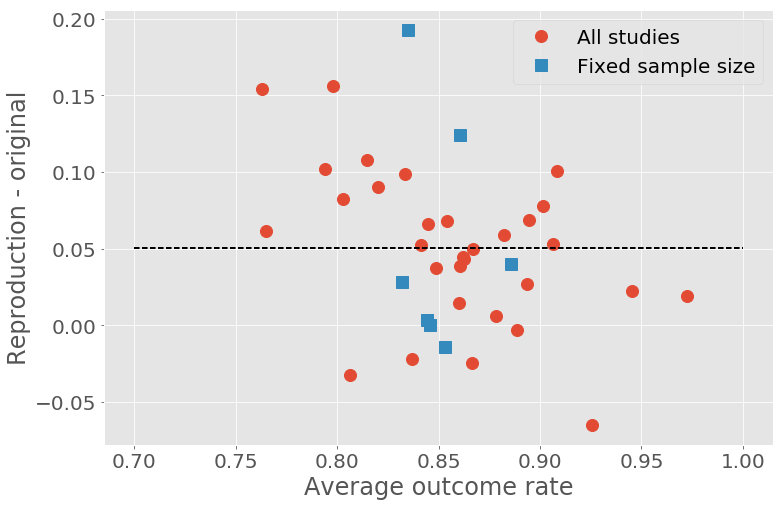

32/38 (84.21%) had repro > study.
If isolating to studies with non-fixed sample size...
26/31 (83.87%) had repro > study.


In [9]:
# bland-altman


# exclude studies which had a fixed sample size
# add physionet2012 studies to this
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72',
                  'che2016recurrent (b)','ding2016mortality',
                  'johnson2012patient', 'johnson2014data']
idxIgnore = np.in1d(df['Cohort'], studies_ignore)


xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[12,8])
plt.plot((df.loc[~idxIgnore,'GB']+df.loc[~idxIgnore,'Study'])/2.0,
         df.loc[~idxIgnore,'GB']-df.loc[~idxIgnore,'Study'],
         marker='o', markersize=12, linestyle='none',
         label='All studies')

# overlay the physionet 2012 datasets
plt.plot((df.loc[idxIgnore,'GB']+df.loc[idxIgnore,'Study'])/2.0,
         df.loc[idxIgnore,'GB']-df.loc[idxIgnore,'Study'],
         marker='s', markersize=12, linestyle='none',
         label='Fixed sample size')

# plot average bias
plt.plot([0.7, 1],
         np.ones(2)*np.mean(df.loc[~idxIgnore,'GB']-df.loc[~idxIgnore,'Study']),
         'k--', linewidth=2)
plt.xlabel('Average outcome rate')
plt.ylabel('Reproduction - original')

plt.legend(loc='upper right')

plt.show()

print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df['GB'] > df['Study'] ), df.shape[0],
        100.0*np.mean( df['GB'] > df['Study'] )
    ))
print('If isolating to studies with non-fixed sample size...')
print('{}/{} ({:2.2f}%) had repro > study.'.format(
        np.sum( df.loc[~idxIgnore,'GB'] > df.loc[~idxIgnore,'Study'] ), np.sum(~idxIgnore),
        100.0*np.mean( df.loc[~idxIgnore,'GB'] > df.loc[~idxIgnore,'Study'] )
    ))